In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Specifikuj cestu k souboru CSV
FILENAME = 'project_verification_results.csv'

# Načtení CSV souboru do DataFrame
data = pd.read_csv(FILENAME)
data

,source_speaker,target_speaker,loss,ref_file,gen_file,score
0,p225,p226,adv,../project_data/source/p225/35.wav,../project_data/converted/p225/converted_a_adv...,0.70731
1,p225,p226,adv,../project_data/source/p225/35.wav,../project_data/converted/p225/converted_a_adv...,0.77139
2,p225,p226,adv,../project_data/source/p225/35.wav,../project_data/converted/p225/converted_a_adv...,0.70102
3,p225,p226,adv,../project_data/source/p225/35.wav,../project_data/converted/p225/converted_a_adv...,0.77039
4,p225,p226,adv,../project_data/source/p225/35.wav,../project_data/converted/p225/converted_a_adv...,0.74844
...,...,...,...,...,...,...
115,p226,p225,norm_cyc,../project_data/source/p226/124.wav,../project_data/converted/p226/converted_b_nor...,0.69153
116,p226,p225,norm_cyc,../project_data/source/p226/124.wav,../project_data/converted/p226/converted_b_nor...,0.68386
117,p226,p225,norm_cyc,../project_data/source/p226/124.wav,../project_data/converted/p226/converted_b_nor...,0.62736
118,p226,p225,norm_cyc,../project_data/source/p226/124.wav,../project_data/converted/p226/converted_b_nor...,0.59749


In [20]:
result_summary = data.groupby(['loss', 'target_speaker']).agg({'score': ['mean', 'std', 'max']})
result_summary.columns = ['mean_score', 'std_deviation', 'max_score']
result_summary = result_summary.sort_values(by='mean_score', ascending=False)

result_summary

mean_score  std_deviation  max_score
loss     target_speaker                                      
asr_cyc  p226              0.757294       0.028518    0.80772
         p225              0.754803       0.051012    0.80181
adv      p225              0.754283       0.043428    0.81374
         p226              0.752906       0.029586    0.79439
norm     p226              0.708738       0.023088    0.73450
all      p226              0.696485       0.024225    0.72202
norm_cyc p226              0.690359       0.027805    0.73826
norm     p225              0.684960       0.045039    0.73542
all      p225              0.658106       0.045730    0.71255
norm_cyc p225              0.651449       0.047895    0.70160
asr      p226              0.599218       0.043386    0.69239
         p225              0.564605       0.039122    0.63085

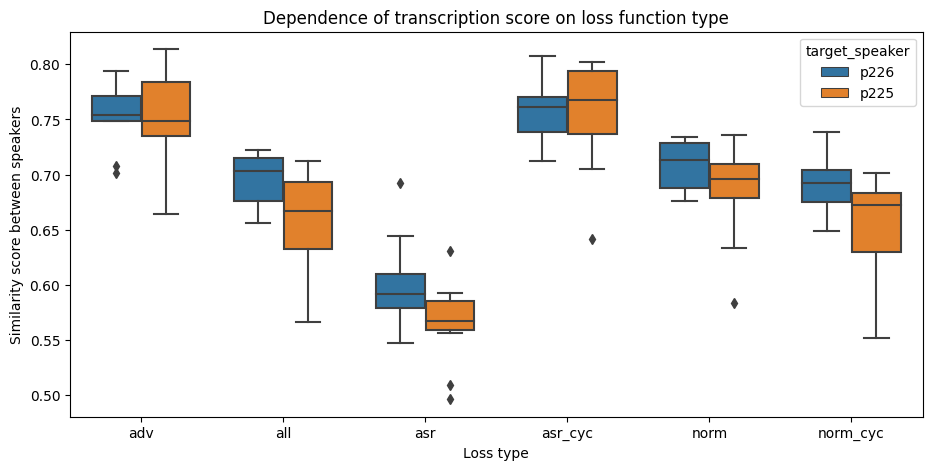

In [21]:
plt.figure(figsize=(11, 5))
sns.boxplot(x='loss', y='score', hue='target_speaker', data=data, width=0.7, dodge=True)

# Přidání popisků os a titulku
plt.xlabel('Loss type')
plt.ylabel('Similarity score between speakers')
plt.title('Dependence of transcription score on loss function type')

# Zobrazení grafu
plt.show()